# Load Libraries

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image, ImageFilter

# Preprocess Input Image

In [37]:
def preprocess_image(img_path):
    # Load the image
    img = Image.open(img_path)

    # Resize with a proper resampling filter
    img_resized = img.resize((60, 60), resample=Image.Resampling.LANCZOS)

    # Convert to RGB (if it was grayscale)
    img_rgb = img_resized.convert("RGB")

    # Gaussian Blur
    img_blurred = img_rgb.filter(ImageFilter.GaussianBlur(radius=2))

    # Weighted Addition (enhancing the original image)
    img_weighted = Image.blend(img_rgb, img_blurred, alpha=0.5)

    # Sharpening Filter
    sharpen_filter = ImageFilter.UnsharpMask(radius=20, percent=150)
    img_sharpened = img_weighted.filter(sharpen_filter)

    # Binary Threshold (optional, depending on your use case)
    threshold_value = 128  # You can adjust this value as needed
    img_binary = img_sharpened.point(
        lambda p: 255 if p > threshold_value else 0
    )

    # Convert to array and normalize pixel values to [0, 1]
    img_array = image.img_to_array(img_binary)  
    img_array /= 255.0  # Normalize pixel values

    return img_array

# Load Model

In [38]:
model = load_model('../models/CNN1_e50_mypc.h5')

# Predict & Interpret Prediction

In [50]:
img_path = '../data/captured/photo_2024 umo.png'
processed_image = preprocess_image(img_path)

predictions = model.predict(np.expand_dims(processed_image, axis=0)) 

predicted_class_index = np.argmax(predictions[0])  # Get index of the highest predicted probability

class_indices = {
    0: 'ং', 1: 'ঃ', 2: 'অ', 3: 'আ', 4: 'ই',
    5: 'ঈ', 6: 'উ', 7: 'ঊ', 8: 'ঋ', 9: 'এ',
    10: 'ঐ', 11: 'ও', 12: 'ঔ', 13: 'ক', 14: 'খ',
    15: 'গ', 16: 'ঘ', 17: 'ঙ', 18: 'চ', 19: 'ছ',
    20: 'জ', 21: 'ঝ', 22: 'ঞ', 23: 'ট', 24: 'ঠ',
    25: 'ড', 26: 'ড়', 27: 'ঢ', 28: 'ঢ়', 29: 'ণ',
    30: 'ত', 31: 'থ', 32: 'দ', 33: 'ধ', 34: 'ন',
    35: 'প', 36: 'ফ', 37: 'ব', 38: 'ভ', 39: 'ম',
    40: 'য', 41: 'য়', 42: 'র', 43: 'ল', 44: 'শ',
    45: 'ষ', 46: 'স', 47: 'হ', 48: 'ৎ', 49: '‍ঁ',
}

# Get predicted class name
predicted_class_name = class_indices.get(predicted_class_index, "Unknown Class")

# Print results
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Name: {predicted_class_name}")
# print("Prediction Values (Probabilities):")
# for i, prob in enumerate(predictions[0]):
#     print(f"{class_indices[i]}: {(prob*100):2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Class Index: 17
Predicted Class Name: ঙ


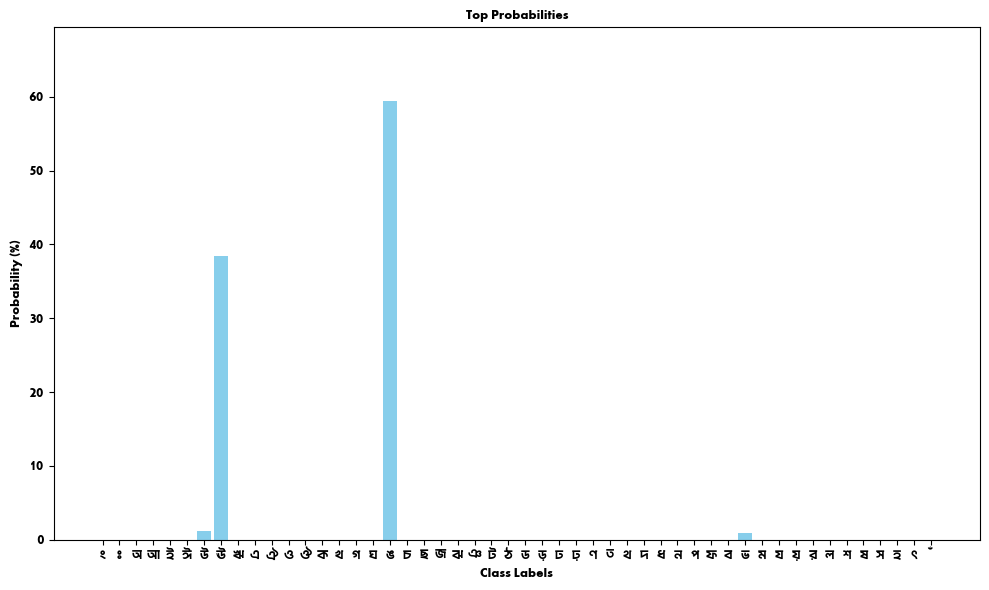

In [51]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "..\\fonts\\Li Shadhinata 2.0 Unicode.ttf"
prop_font = fm.FontProperties(fname=font_path)

# Prepare data for plotting
probabilities = [prob *100 for prob in predictions[0]] # Convert to percentage
labels = [class_indices[i] for i in range(len(probabilities))]

# Create a bar graph
plt.figure(figsize=(10,6))
plt.bar(labels, probabilities, color='skyblue') # Reverse for descending order
plt.ylim(0, max(probabilities) + 10) # Set y-axis limit slightly larger than max probability
plt.title('Top Probabilities')
plt.ylabel('Probability (%)')
plt.xlabel('Class Labels')

# Set font properties if needed (make sure the font file path is correct)
font_path = "..\\fonts\\Li Shadhinata 2.0 Unicode.ttf"
prop_font = fm.FontProperties(fname=font_path)
plt.xticks(fontproperties=prop_font)
plt.yticks(fontproperties=prop_font)
plt.title('Top Probabilities', fontproperties=prop_font)
plt.ylabel('Probability (%)', fontproperties=prop_font)
plt.xlabel('Class Labels', fontproperties=prop_font)

# Show the plot
plt.tight_layout()
plt.show()